# First Name: Finley
# Last Name: Sherwood

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# Read in CSV File

In [2]:
sales = pd.read_csv('sales.csv')
sales.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,4/07/2015,1477969,3829822,278080
1,11/07/2015,1459132,3425039,292275
2,18/07/2015,1515182,3963434,313403
3,25/07/2015,1454695,3792073,273735
4,1/08/2015,1495088,4632792,302424


In [3]:
sales['Week Ending Date'] = pd.to_datetime(sales['Week Ending Date'], format='%d/%m/%Y')

In [4]:
sales.set_index('Week Ending Date', inplace=True)
sales.head()

,Lotto,Instant,Pulltab
Week Ending Date,,,
2015-07-04,1477969,3829822,278080
2015-07-11,1459132,3425039,292275
2015-07-18,1515182,3963434,313403
2015-07-25,1454695,3792073,273735
2015-08-01,1495088,4632792,302424


# Data Management

In [5]:
sales['Instant'] = pd.to_numeric(sales['Instant'])
print(sales.describe())

              Lotto       Instant        Pulltab
count  1.830000e+02  1.830000e+02     183.000000
mean   2.112038e+06  4.559790e+06  233934.338798
std    1.607643e+06  7.422811e+05   66801.865481
min    1.341382e+06  3.128323e+06  110805.000000
25%    1.546407e+06  3.978167e+06  187110.000000
50%    1.677419e+06  4.459901e+06  229280.000000
75%    2.014369e+06  4.950061e+06  276428.000000
max    1.366234e+07  6.851486e+06  630855.000000


In [6]:
sales.index

DatetimeIndex(['2015-07-04', '2015-07-11', '2015-07-18', '2015-07-25',
               '2015-08-01', '2015-08-08', '2015-08-15', '2015-08-22',
               '2015-08-29', '2015-09-05',
               ...
               '2018-10-27', '2018-11-03', '2018-11-10', '2018-11-17',
               '2018-11-24', '2018-12-01', '2018-12-08', '2018-12-15',
               '2018-12-22', '2018-12-29'],
              dtype='datetime64[ns]', name='Week Ending Date', length=183, freq=None)

In [7]:
sales[:'2015-07-18']

,Lotto,Instant,Pulltab
Week Ending Date,,,
2015-07-04,1477969,3829822,278080
2015-07-11,1459132,3425039,292275
2015-07-18,1515182,3963434,313403


In [8]:
sales['2018']

,Lotto,Instant,Pulltab
Week Ending Date,,,
2018-01-06,5807381,5252078,114075
2018-01-13,1448614,4041543,229280
2018-01-20,1477223,3976313,177271
2018-01-27,1544632,6558756,185895
2018-02-03,1677419,4687578,188572
2018-02-10,1609902,4417931,174825
2018-02-17,1780598,5671052,184410
2018-02-24,1825432,4484306,214380
2018-03-03,2301149,5128607,185085


# Visualise Time Series

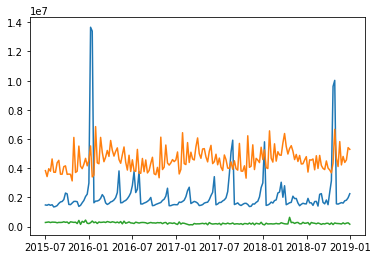

In [9]:
%matplotlib inline
plt.plot(sales)

In [10]:
sales['month'] = sales.index.month
sales.head()

,Lotto,Instant,Pulltab,month
Week Ending Date,,,,
2015-07-04,1477969,3829822,278080,7
2015-07-11,1459132,3425039,292275,7
2015-07-18,1515182,3963434,313403,7
2015-07-25,1454695,3792073,273735,7
2015-08-01,1495088,4632792,302424,8


# Box plot

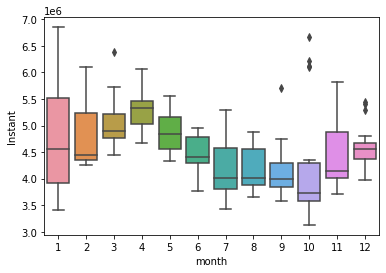

In [11]:
ax = sns.boxplot(x='month', y='Instant', data=sales)

# 2. Stationarity  - Check

In [12]:
def test_stationarity(timeseries):
   rolling_mean = timeseries.rolling(window=12).mean()
   rolling_std = timeseries.rolling(window=12).std()

   # Plot rolling statistics
   original = plt.plot(timeseries, color='blue', label='Original')
   mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
   std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
   plt.legend(loc='best')
   plt.title('Rolling Mean & Standard Deviation')
   plt.show(block=False)

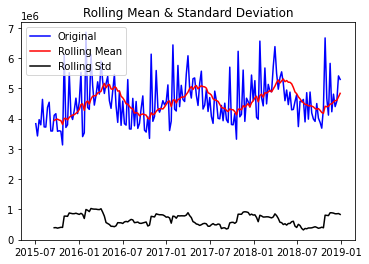

In [13]:
test_stationarity(sales['Instant'])

In [14]:
# Perform Dickey-Fuller test
def test_Dickey_Fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic',
        'p-value',
        '#Lags Used',
        'Number of Observations Used'
    ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [15]:
test_Dickey_Fuller(sales['Instant'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.089163
p-value                          0.027366
#Lags Used                      13.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


# Make Time Series Stationary

# Decomposing

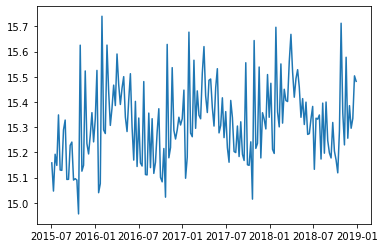

In [16]:
ts_log = np.log(sales['Instant'])
plt.plot(ts_log)

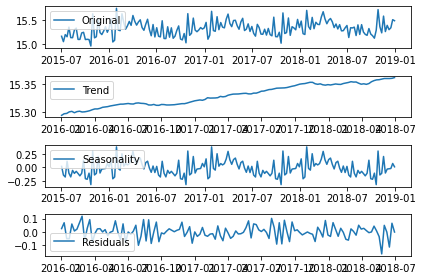

In [17]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

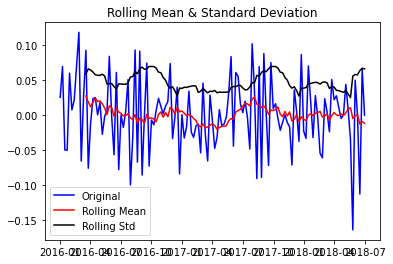

In [18]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [19]:
test_Dickey_Fuller(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                  -4.507332
p-value                          0.000191
#Lags Used                       5.000000
Number of Observations Used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64


# Plot ACF & PACF chart & find optimal parameter

In [20]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
lag_acf = acf(ts_log_diff, nlags=20, fft=False)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

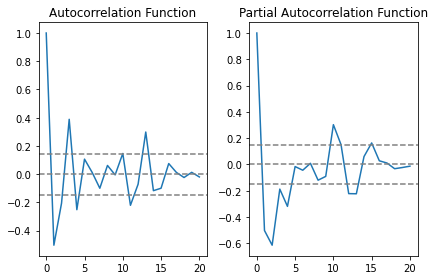

In [21]:
# ACF
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Build ARIMA model

In [22]:
# Ignoring warnings given from jupyter notebook as they are mostly about deprecation
import warnings
warnings.filterwarnings('ignore')

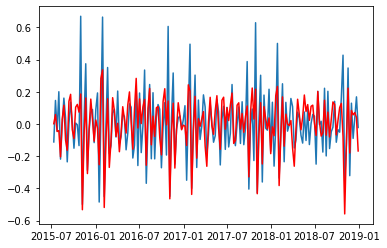

In [23]:
model = ARIMA(ts_log, order=(2, 1, 1))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Make predictions

In [24]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [25]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [26]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

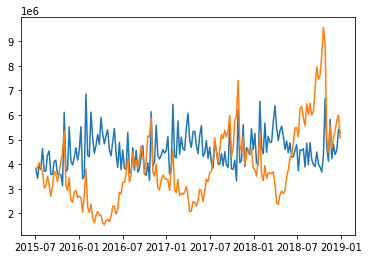

In [27]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(sales['Instant'])
plt.plot(predictions_ARIMA)